# What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), ethnographer/postdoc, [Berkeley Institute for Data Science](http://bids.berkeley.edu)

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

## Introduction
In 2013, the ACM conference on Computer-Supported Cooperative Work (CSCW) removed a strict page limit, which had previously set the length for full papers at 10 pages and notes at 4 pages. Officially, papers can now be any length, from one page to infinity (or whatever the system supports). However, CSCW authors and reviewers [are told that](https://cscw.acm.org/2016/submit/papers.php) "Papers whose length is incommensurate with their contribution will be rejected." So what is the new normal for page lengths? 

I am exploring this question in this Jupyter notebook, as well as trying to document my data collection, processing, and analysis in as open and reproducible as a manner as I can. I am using a mix of bash commands and python scripts to process and collect the data.


## Data collection and processing
Import libraries we will use: Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2)

I used my web browser to go to ACM Digital Library's table of contents for [CSCW 2012](http://dl.acm.org/citation.cfm?id=2145204), [2013](http://dl.acm.org/citation.cfm?id=2441776), [2014](http://dl.acm.org/citation.cfm?id=2531602), [2015](http://dl.acm.org/citation.cfm?id=2675133&preflayout=flat) and [2016](http://dl.acm.org/citation.cfm?id=2818048&preflayout=flat), which has page numbers for every paper in plain text. Note that these table of contents do not include the "companion" proceedings, which are a separate published proceedings series that contains workshop proposals and extended abstracts for posters. Some years, one to two page abstracts for keynotes are included in the core proceedings, while other years they are included in the companion proceedings.

I did a very low-tech, non-automated way of importing the data (which also doesn't violate the ACM Digital Library's strict [terms of service](http://librarians.acm.org/policies#anchor4), which expressly prohibits automated scraping of metadata or articles. I selected the entire table of contents in my browser, then copied and pasted the HTML as plain text into a text editor. These plain text table of contents files are up on my [github repository](https://github.com/staeiou/cscw-pages/). 

### Exploring the table of contents metadata

In [2]:
%%bash
ls toc-pages

cscw-2008.txt
cscw-2010.txt
cscw-2011.txt
cscw-2012.txt
cscw-2013.txt
cscw-2014.txt
cscw-2015.txt
cscw-2016.txt
cscw-2017.txt


Peeking at one of these files using head (via the bash command line shell), they have the page numbers in lines that begin with "Pages:"

In [3]:
%%bash 
head -n 25 toc-pages/cscw-2015.txt

Big social data, such as that produced by Facebook and Twitter, have the potential to transform the social sciences and lead to advances in understanding human behavior. At the same time, novel large-scale methods and forms of collaboration between academia ... expand
SESSION: Crowdfunding
Understanding the Effects of Crowdfunding on Entrepreneurial Self-Efficacy
Emily Harburg, Julie Hui, Michael Greenberg, Elizabeth M. Gerber
Pages: 3-16
doi>10.1145/2675133.2675142
Full text: PDFPDF

Crowdfunding is emerging as a new socio-technical system that is changing how entrepreneurs interact with their community of financial supporters. While computer supported cooperative work (CSCW) researchers have begun to explore how this new type of ... expand
Crowds on Wall Street: Extracting Value from Collaborative Investing Platforms
Gang Wang, Tianyi Wang, Bolun Wang, Divya Sambasivan, Zengbin Zhang, Haitao Zheng, Ben Y. Zhao
Pages: 17-30
doi>10.1145/2675133.2675144
Full text: PDFPDF

In crowdsource

We can use grep via the command line to just get these lines containing "Pages: ":

In [4]:
%%bash 
cat toc-pages/cscw-2015.txt | grep "Pages: " | head

Pages: 3-16
Pages: 17-30
Pages: 31-43
Pages: 44-55
Pages: 56-68
Pages: 69-81
Pages: 82-94
Pages: 95-104
Pages: 105-115
Pages: 116-129


### Processing table of contents metadata
I'm going to keep using the bash shell to parse these text files and put them into CSV files, which I will then load into python. So first, create the beginning of CSV files for each year, with headers for the start and end pages

In [5]:
%%bash
#mkdir data
for year in {2008..2017}
do
    echo "start_page,end_page" > data/cscw-$year-pages.csv
done

Parse these files for only lines containing "Pages: ", then remove "Pages: " and replace the dash with a comma. Append this to the CSV files. There was no CSCW 2009, so igore that error.

In [6]:
%%bash
for year in {2008..2017}
do
    cat toc-pages/cscw-$year.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> data/cscw-$year-pages.csv
done

cat: toc-pages/cscw-2009.txt: No such file or directory


Load these into Pandas dataframes in python.

In [7]:
cscw_pages = {}
years = [2008,2010,2011,2012,2013,2014,2015,2016,2017]
for count in years:
    cscw_pages[count] = pd.read_csv("data/cscw-" + str(count) + "-pages.csv")

cscw_pages[2017][0:5]

,start_page,end_page
0,2,12
1,13,25
2,26,40
3,41,50
4,51,69


## Data analysis and visualization

Create new dataframes for each year containing the length of each paper by subtracting the start page from the end page, then adding one.

In [8]:
cscw_len = {}
for year, dict_df in cscw_pages.items():
    cscw_len[year] = dict_df['end_page'] - dict_df['start_page'] + 1
    
cscw_len[2017][0:5]

0    11
1    13
2    15
3    10
4    19
dtype: int64

We can use the value_counts() function to count up the different page lengths, which we can then plot into bar charts.


### CSCW 2008

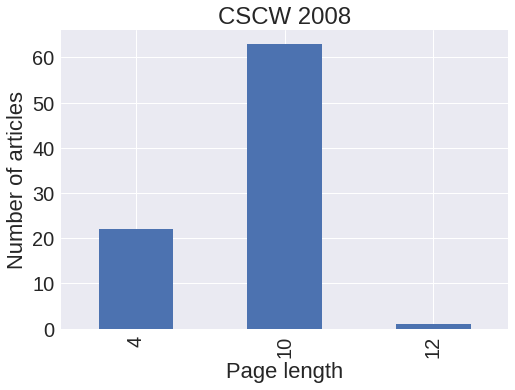

In [9]:
cscw_plot = {}

cscw_plot[2008] = cscw_len[2008].value_counts(sort=False).plot(kind='bar',title="CSCW 2008")
cscw_plot[2008].set_xlabel("Page length")
cscw_plot[2008].set_ylabel("Number of articles")

### CSCW 2010

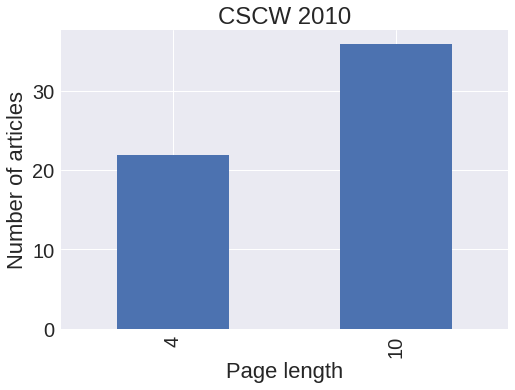

In [10]:
cscw_plot = {}

cscw_plot[2010] = cscw_len[2010].value_counts(sort=False).plot(kind='bar',title="CSCW 2010")
cscw_plot[2010].set_xlabel("Page length")
cscw_plot[2010].set_ylabel("Number of articles")

### CSCW 2011

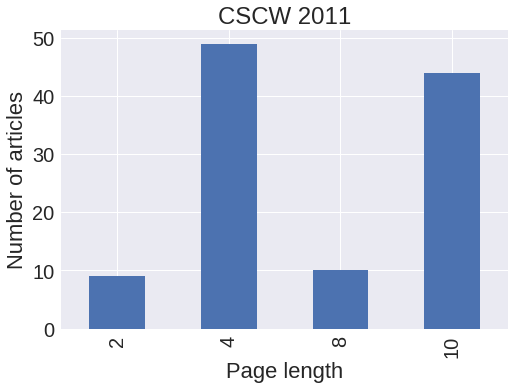

In [11]:
cscw_plot = {}

cscw_plot[2011] = cscw_len[2011].value_counts(sort=False).plot(kind='bar',title="CSCW 2011")
cscw_plot[2011].set_xlabel("Page length")
cscw_plot[2011].set_ylabel("Number of articles")

### CSCW 2012, last year before 10 page limit was removed

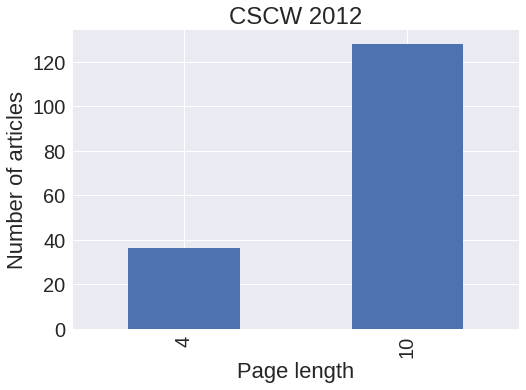

In [12]:
cscw_plot = {}

cscw_plot[2012] = cscw_len[2012].value_counts(sort=False).plot(kind='bar',title="CSCW 2012")
cscw_plot[2012].set_xlabel("Page length")
cscw_plot[2012].set_ylabel("Number of articles")

In [13]:
cscw_len[2012].describe()

count    164.000000
mean       8.682927
std        2.491103
min        4.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       10.000000
dtype: float64

### CSCW 2013, first year 10 page limit was removed

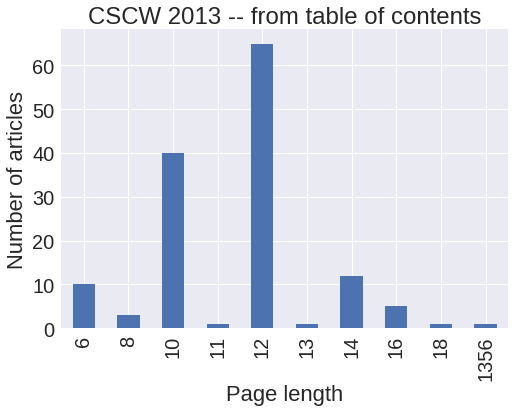

In [14]:
cscw_plot[2013] = cscw_len[2013].value_counts(sort=False).plot(kind='bar',title="CSCW 2013 -- from table of contents")
cscw_plot[2013].set_xlabel("Page length")
cscw_plot[2013].set_ylabel("Number of articles")

In [15]:
cscw_len[2013].describe()

count     139.000000
mean       20.935252
std       114.080204
min         6.000000
25%        10.000000
50%        12.000000
75%        12.000000
max      1356.000000
dtype: float64

### Re-do CSCW 2013 based on PDFs

So I did some spot checking to make sure this wasn't some weird artifact of the metadata... and it turns out that there are some inaccracies with the page numbers. For example:

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441946) says it is pages 149-1504, which would make it 1,356 pages. If you look at the PDF, then it is a 6 page PDF, which is from pages 1499 to 1504. That explains this big outlier.

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441793) says it is pages 129-144, which would make it 16 pages (page 129, page 130, page 131 .... to page 144). But if you view the full text PDF, then it is a 15 page PDF, with the page numbers 129 to 143 (and it ends short on page 143). 

* The metadata for [this next article](http://dl.acm.org/citation.cfm?id=2441794) says it is pages 145-156, which would make it 12 pages (page 145, page 146, page 147 .... to page 156). But if you view the full text PDF, then it is an 11 page PDF, with the page numbers 145 to 155 (and it ends short on page 155). 

* The metadata for [this article](http://dl.acm.org/citation.cfm?id=2441788) says it is pages 79-90, which would make it 12 pages (page 79, page 80, page 81 .... to page 90). But if you view the full text PDF, then it is an 11 page PDF, with the page numbers 79 to 89 (although it goes all the way to the end of page 89).

So these counterexamples are enough to show that the metadata is wrong in multiple cases: we have found the mistaken 1,356 page article; we have found one 15 page article, when the metadata says there are none; and we found two 11 page articles, when the metadata says there is only one.

In order to figure this out in more detail, I manually downloaded (while watching television) all the PDFs published in CSCW 2013 in the ACM Digital Library, as automatically scraping is in violation of their [terms of service.](http://librarians.acm.org/policies#anchor4). I have not uploaded these to this repository, because they are copyrighted.

In [16]:
!pip install PyPDF2
import PyPDF2

In [17]:
import re
import os
import glob

rxcountpages = re.compile(r"/Type\s*/Page([^s]|$)", re.MULTILINE|re.DOTALL)

def count_pages(filename):
    with open(filename,"rb") as f:
        data = f.read()
    return len(rxcountpages.findall(data))

In [18]:
cscw_len[2013] = []

for filename in glob.glob("/home/staeiou/github/cscw-pages/data/pdfs/2013/*.pdf"):
    pr = PyPDF2.PdfFileReader(filename)
    pages = len(pr.pages)
    cscw_len[2013].append(pages)

cscw_len[2013] = pd.Series(cscw_len[2013])

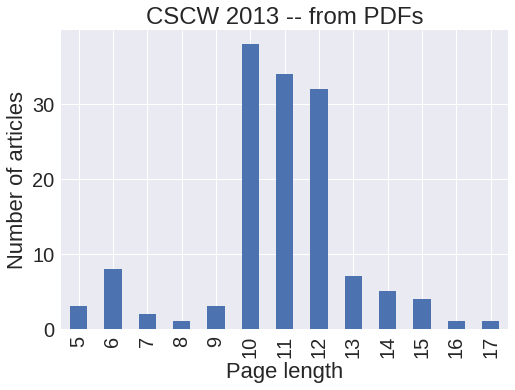

In [19]:
cscw_plot[2013] = cscw_len[2013].value_counts(sort=False).plot(kind='bar',title="CSCW 2013 -- from PDFs")
cscw_plot[2013].set_xlabel("Page length")
cscw_plot[2013].set_ylabel("Number of articles")

In [20]:
cscw_len[2013].describe()

count    139.000000
mean      10.820144
std        2.127296
min        5.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       17.000000
dtype: float64

### CSCW 2014

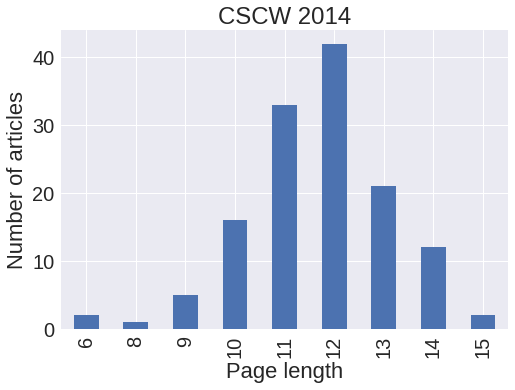

In [21]:
cscw_plot[2014] = cscw_len[2014].value_counts(sort=False).plot(kind='bar',title="CSCW 2014")
cscw_plot[2014].set_xlabel("Page length")
cscw_plot[2014].set_ylabel("Number of articles")

In [22]:
cscw_len[2014].describe()

count    134.000000
mean      11.664179
std        1.506597
min        6.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       15.000000
dtype: float64

### CSCW 2015

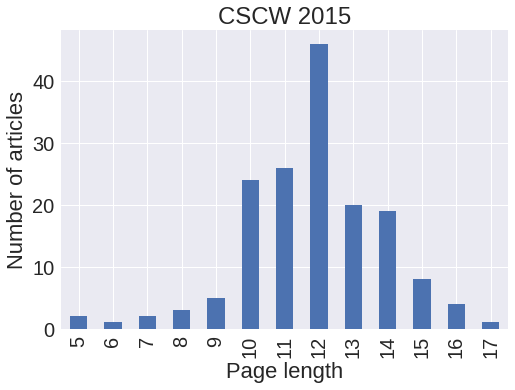

In [23]:
cscw_plot[2015] = cscw_len[2015].value_counts(sort=False).plot(kind='bar',title="CSCW 2015")
cscw_plot[2015].set_xlabel("Page length")
cscw_plot[2015].set_ylabel("Number of articles")

In [24]:
cscw_len[2015].describe()

count    161.000000
mean      11.826087
std        2.017316
min        5.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       17.000000
dtype: float64

### CSCW 2016

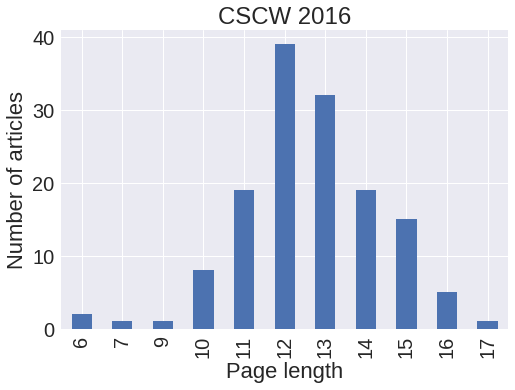

In [25]:
cscw_plot[2016] = cscw_len[2016].value_counts(sort=False).plot(kind='bar',title="CSCW 2016")
cscw_plot[2016].set_xlabel("Page length")
cscw_plot[2016].set_ylabel("Number of articles")

In [26]:
cscw_len[2016].describe()

count    142.000000
mean      12.598592
std        1.794633
min        6.000000
25%       12.000000
50%       13.000000
75%       14.000000
max       17.000000
dtype: float64

### CSCW 2017

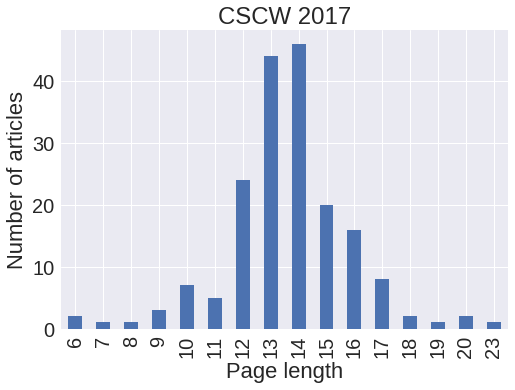

In [27]:
cscw_plot[2017] = cscw_len[2017].value_counts(sort=False).plot(kind='bar',title="CSCW 2017")
cscw_plot[2017].set_xlabel("Page length")
cscw_plot[2017].set_ylabel("Number of articles")

In [28]:
cscw_len[2017].describe()

count    183.000000
mean      13.622951
std        2.254402
min        6.000000
25%       13.000000
50%       14.000000
75%       15.000000
max       23.000000
dtype: float64

## Make a tidy dataframe for all years

Instead of our dictionary of dataframes for each year, tidy dataframes have one row for each case -- in our data, {year, num_pages}. This makes comparison across years easier.

In [29]:
tidy_df = pd.DataFrame(columns=["year", "num_pages"])

In [30]:
cscw_len_means = {}
cscw_len_median = {}
for year, series in cscw_len.items():
    for item in series:
        tidy_df = tidy_df.append({"year":str(year), "num_pages":item}, ignore_index=True)

## Plot distribution of full article length over time

### Get dataframe for non-note articles for all years

There were no four page papers published after 2012, so we can filter the tidy dataframe for full articles by selecting only rows with num_pages over 4. 

In [31]:
tidy_df_no_notes = tidy_df.query("num_pages>4")

### Plot dataframe

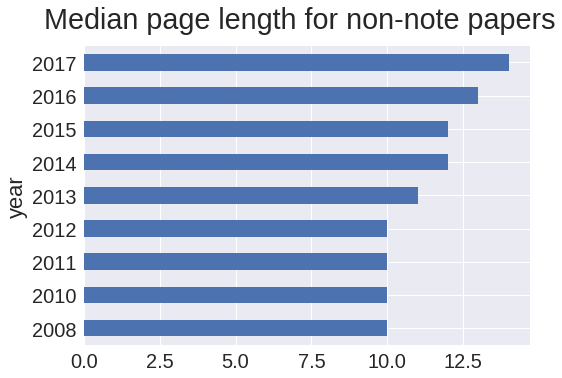

In [32]:
gb = tidy_df_no_notes.groupby("year")
gb.median().plot(kind='barh',legend=False)
plt.suptitle("Median page length for non-note papers")

### Boxplots

In these boxplots:
- the center line in the box is the median
- the box is bounded between the 25th and 75th percentiles (50% of the values are in this box)
- the whiskers are the 5th and 95th percentiles
- dots are cases below the 5th or above the 95th percentiles

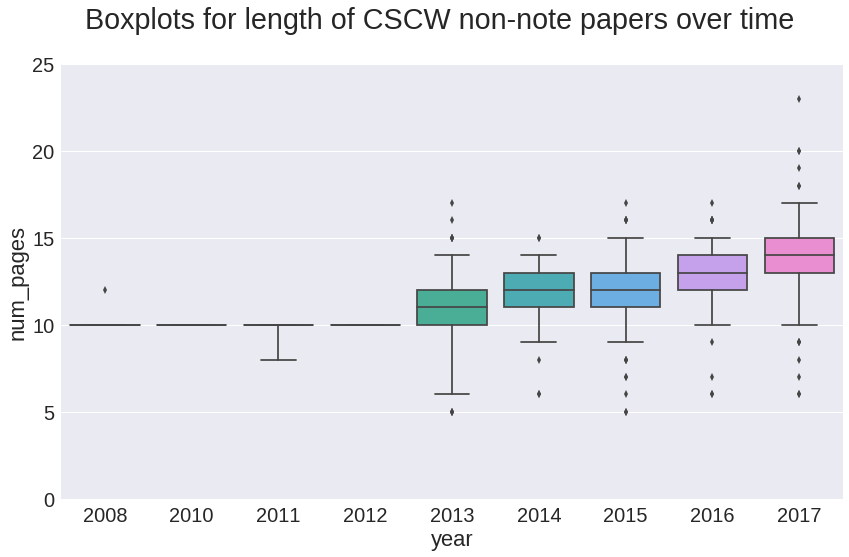

In [33]:
import matplotlib.pyplot as plt
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=[14,8])
sns.boxplot(data=tidy_df_no_notes, y='num_pages', x='year', whis=[5,95], ax=ax)
ax.set_ylim([0,25])
plt.suptitle("Boxplots for length of CSCW non-note papers over time")

In [34]:
gb.describe().unstack()

num_pages                                                   
         count       mean       std   min   25%   50%   75%   max
year                                                             
2008      64.0  10.031250  0.250000  10.0  10.0  10.0  10.0  12.0
2010      36.0  10.000000  0.000000  10.0  10.0  10.0  10.0  10.0
2011      54.0   9.629630  0.784190   8.0  10.0  10.0  10.0  10.0
2012     128.0  10.000000  0.000000  10.0  10.0  10.0  10.0  10.0
2013     139.0  10.820144  2.127296   5.0  10.0  11.0  12.0  17.0
2014     134.0  11.664179  1.506597   6.0  11.0  12.0  13.0  15.0
2015     161.0  11.826087  2.017316   5.0  11.0  12.0  13.0  17.0
2016     142.0  12.598592  1.794633   6.0  12.0  13.0  14.0  17.0
2017     183.0  13.622951  2.254402   6.0  13.0  14.0  15.0  23.0

One of the interesting things these boxplots show is the shift in distributions over just a few years. 2008-2012 had almost uniform distributions of 10 pages. In 2013, the median was 11 pages, with 50% of the papers between 10 and 12 pages. In 2015, the median was 12 pages, with 50% of the papers between 11 and 13 pages. In 2017, the median was 14 pages, with 50% of the papers between 13 and 15 pages.

## Output to file

In [35]:
tidy_df.to_pickle("data/cscw_pages_tidy_df.pickle")
tidy_df.to_csv("data/cscw_pages_tidy_df.tsv", sep="\t")